In [1]:
import csv
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
def getAve(arr):
    return sum([int(x) for x in arr]) / len(arr)

def getListOfFiles(re, _pre = 7, _post = 4):
    return sorted(glob.glob(re), key=lambda s: int(s[_pre:-1 * _post]))

def getFirstRowOfCsv(file_name):
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        # Retun the first row
        for row in spamreader:
            return row

In [3]:
### Global Variables
y = []
err = []
# fileRE = '../experiments/Exp1-as-ganache-done/final-sep/Exp1-aws1-new-contract-sep-trial#*.csv'
fileRE = '../experiments/Exp1-100M-trial#*.csv'

# fileRE = '../experiments/Exp1-aws-ganache-done/Exp1-aws2-*.csv'
preChar = 26 + 5
postChar = 4

In [4]:
### Main Execution

rows = np.empty([10,10])

for row_id,file_name in enumerate(getListOfFiles(fileRE,preChar,postChar)):
    row = np.asarray(getFirstRowOfCsv(file_name))
    
    print(file_name, row)
    rows[row_id] = row

rows_t = np.transpose(rows)

for r in rows_t:
    y.append(getAve(r))
    err.append(np.std(r.astype(np.float)))

../experiments/Exp1-100M-trial#1.csv ['443' '749' '1095' '1465' '1794' '2135' '2511' '3004' '3325' '3638']
../experiments/Exp1-100M-trial#2.csv ['376' '780' '1044' '1478' '1790' '2128' '2513' '2902' '3247' '3603']
../experiments/Exp1-100M-trial#3.csv ['350' '696' '1124' '1347' '1791' '2108' '2495' '2928' '3142' '3582']
../experiments/Exp1-100M-trial#4.csv ['336' '719' '1088' '1467' '1710' '2170' '2474' '2773' '3191' '3614']
../experiments/Exp1-100M-trial#5.csv ['326' '679' '1147' '1409' '1779' '2217' '2422' '2985' '3174' '3616']
../experiments/Exp1-100M-trial#6.csv ['348' '713' '1105' '1400' '1964' '2132' '2416' '2975' '3266' '3581']
../experiments/Exp1-100M-trial#7.csv ['348' '806' '1126' '1520' '1723' '2208' '2523' '2835' '3272' '3676']
../experiments/Exp1-100M-trial#8.csv ['353' '771' '1035' '1462' '1881' '2100' '2604' '2848' '3365' '3693']
../experiments/Exp1-100M-trial#9.csv ['404' '709' '1102' '1439' '1822' '2158' '2601' '2791' '3384' '3717']
../experiments/Exp1-100M-trial#10.csv

[ 363.1  732.7 1111.9 1437.1 1819.  2152.8 2520.2 2909.4 3258.2 3641.8]
[ 2  4  6  8 10 12 14 16 18 20]
[33.64951708420197, 39.342216511020325, 57.45685337712116, 48.93352633931055, 79.69567114969294, 37.44275630879756, 72.14263649188321, 90.50878410408572, 76.78515481523756, 47.786609002941404]


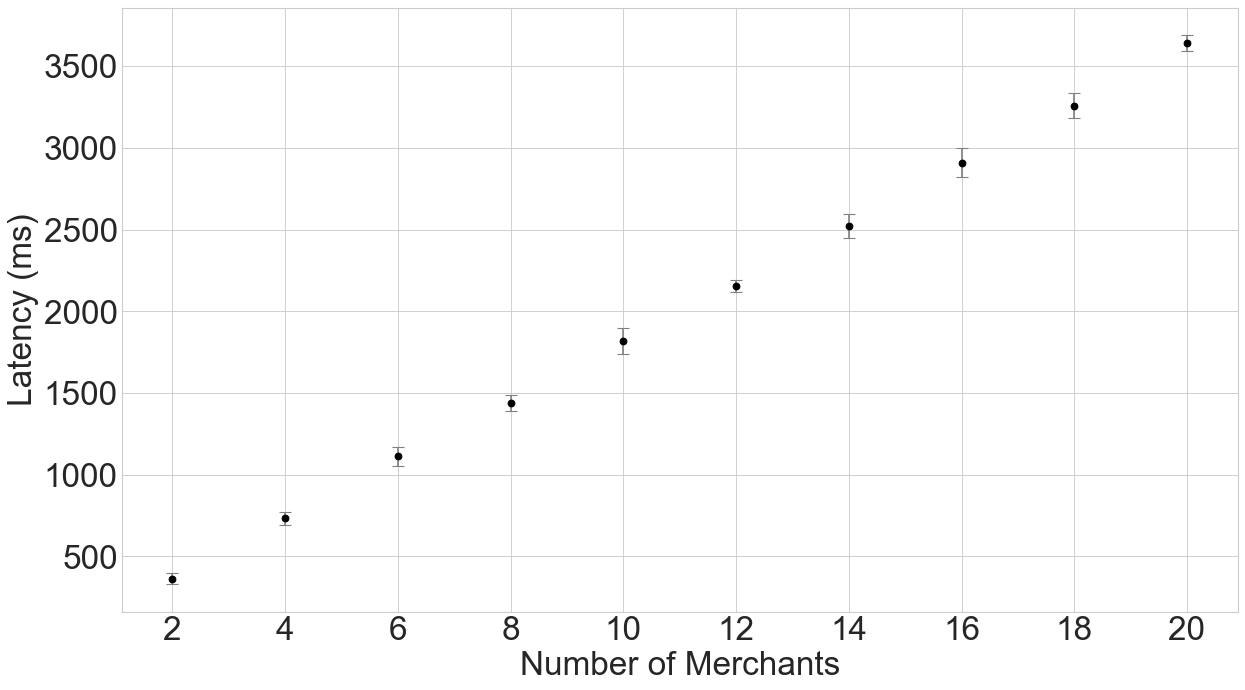

In [5]:
x = np.arange(2,21,2)
# x = np.arange(10,101,10)
y = np.asarray(y)
print(y)
print(x)
print(err)

plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 30})
plt.xticks(np.arange(2, 21, step=2))
# plt.yticks(np.arange(0, 70000, step=10000))
# plt.xlabel("Number of consensuses (Custodian)")
# plt.xlabel("Participation threshold (%)")
plt.xlabel("Number of Merchants")
plt.ylabel("Latency (ms)")
# plt.title("Experiment 4: The settle latency test on various numbers of clients")
plt.errorbar(x, y, err, fmt="ok", capsize=5, ecolor="grey");

In [6]:
# saveName = "Exp1"
# plt.savefig('../figures/'+saveName+'.png')
plt.show()

<BarContainer object of 3 artists>

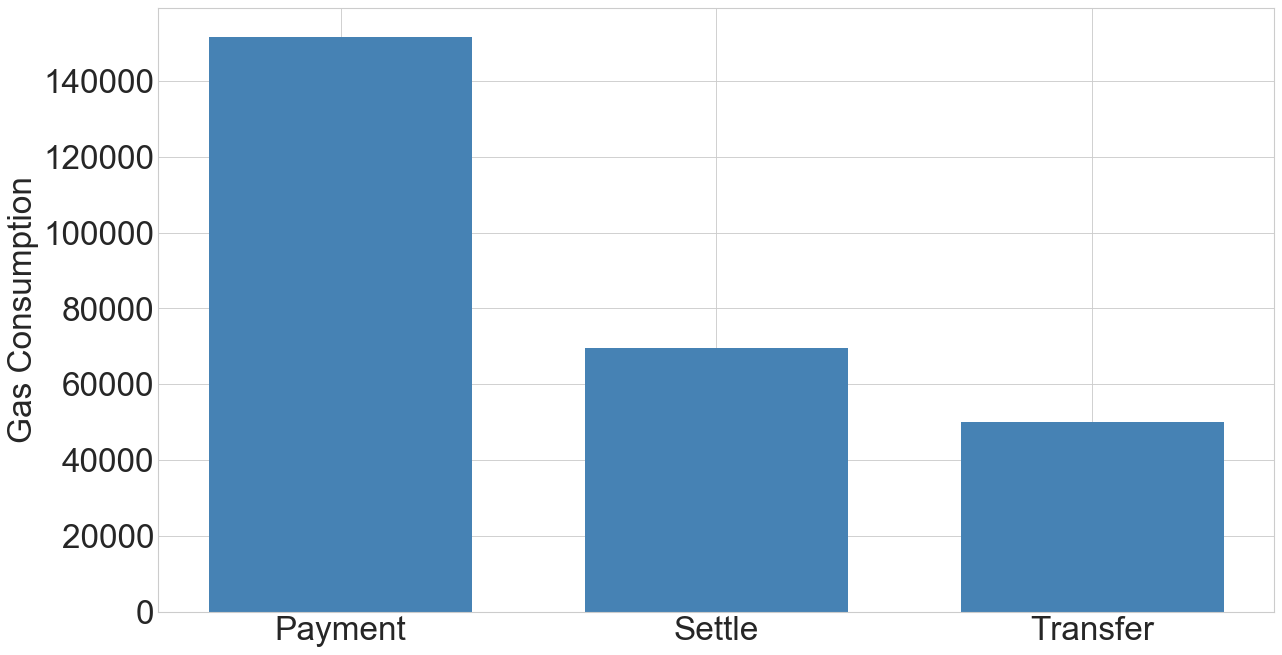

In [7]:
# plt.figure(num=None, figsize=(18, 10), dpi=800, facecolor='w', edgecolor='k')

# _, ax = plt.subplots()
# Draw bars, position them in the center of the tick mark on the x-axis
x_data = ["Payment", "Settle", "Transfer"]
y_data = [151642, 69496, 50146]

plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 30})
plt.ylabel('Gas Consumption')

plt.bar(x_data, y_data, color = "steelblue", align = 'center', width = 0.7)